# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv",sep="\t")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [55]:
top_5_items_bought = chipo.groupby(by="item_name").sum().sort_values(by="quantity",ascending=False).reset_index().head(5)
top_5_items_bought

,item_name,order_id,quantity
0,Chicken Bowl,713926,761
1,Chicken Burrito,497303,591
2,Chips and Guacamole,449959,506
3,Steak Burrito,328437,386
4,Canned Soft Drink,304753,351


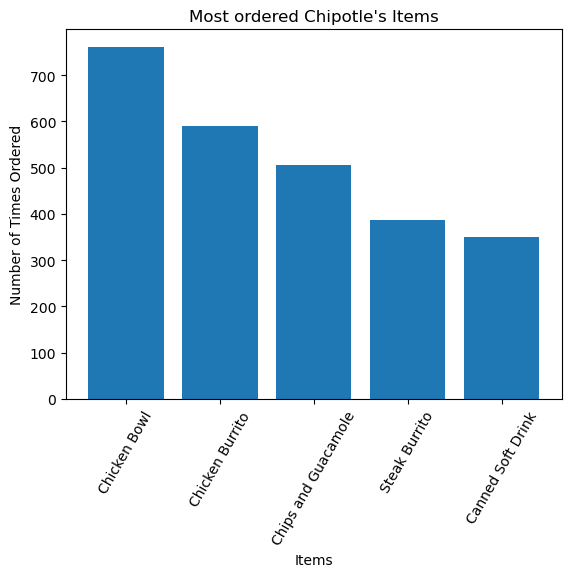

In [91]:
plt.bar(top_5_items_bought.item_name,top_5_items_bought.quantity)
plt.xlabel("Items")
plt.ylabel("Number of Times Ordered")
plt.title("Most ordered Chipotle's Items")
plt.tick_params(axis="x", labelrotation=60)

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [80]:
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [83]:
data=chipo.groupby(by="order_id").sum().reset_index()
data

,order_id,quantity,item_price
0,1,4,11.56
1,2,2,16.98
2,3,2,12.67
3,4,2,21.00
4,5,2,13.70
...,...,...,...
1829,1830,2,23.00
1830,1831,3,12.90
1831,1832,2,13.20
1832,1833,2,23.50


Text(0.5, 1.0, 'Number of items ordered per order price')

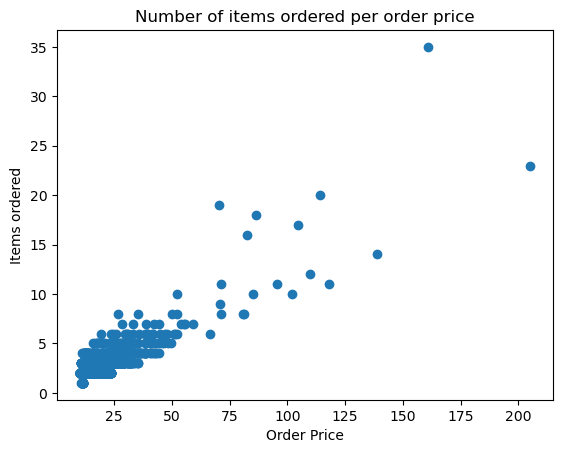

In [85]:
plt.scatter(data.item_price,data.quantity)
plt.xlabel("Order Price")
plt.ylabel("Items ordered")
plt.title("Number of items ordered per order price")

### Step 7. BONUS: Create a question and a graph to answer your own question.